In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import graphviz
from sklearn.tree import export_graphviz
import os

In [30]:
#!pip install graphviz

In [31]:
df=pd.read_csv("dataset.csv")

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
correlation_metrics=df.corr()
print(correlation_metrics)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

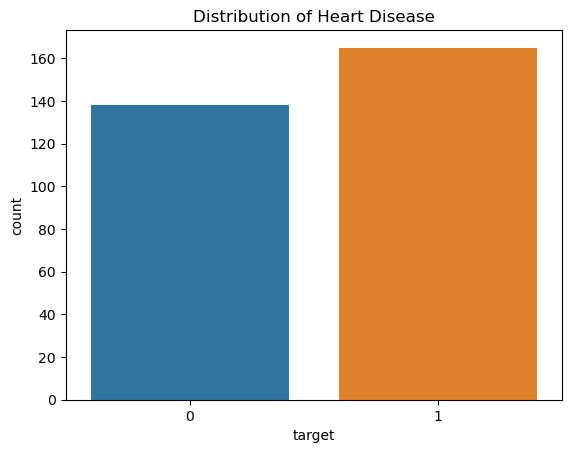

In [38]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

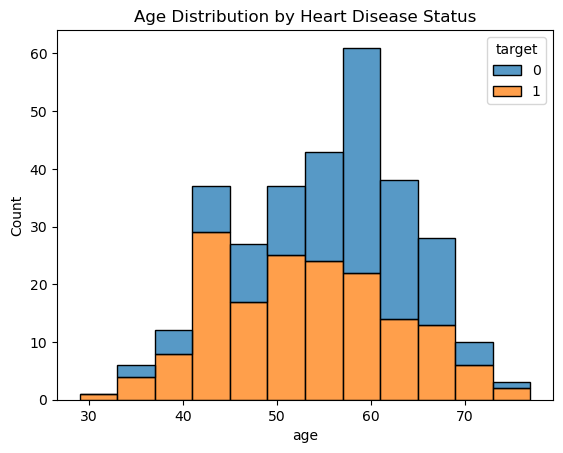

In [39]:
sns.histplot(df, x='age', hue='target', multiple='stack')
plt.title('Age Distribution by Heart Disease Status')
plt.show()


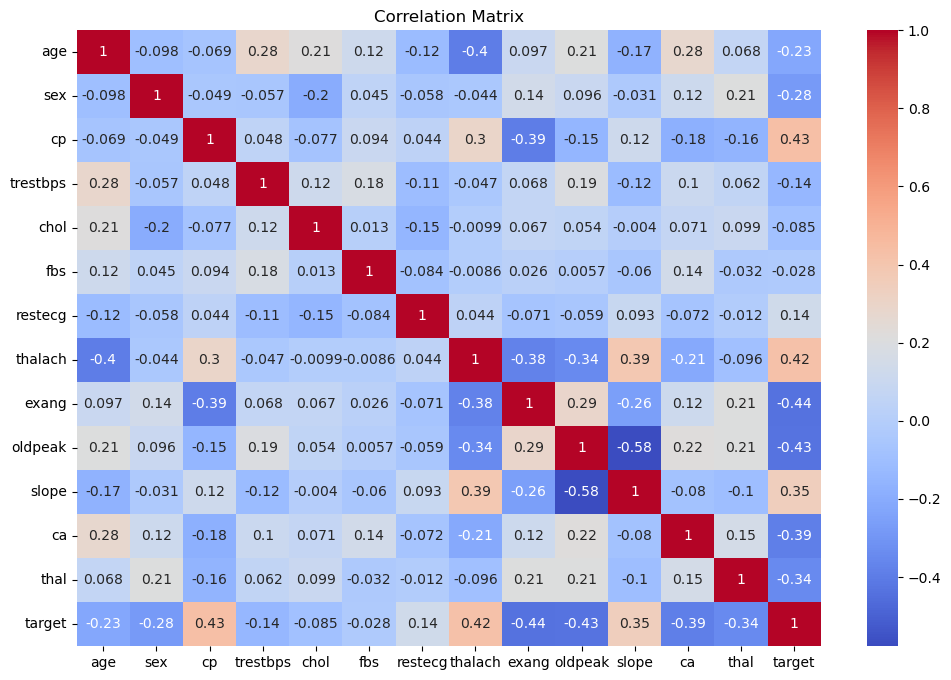

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_metrics, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

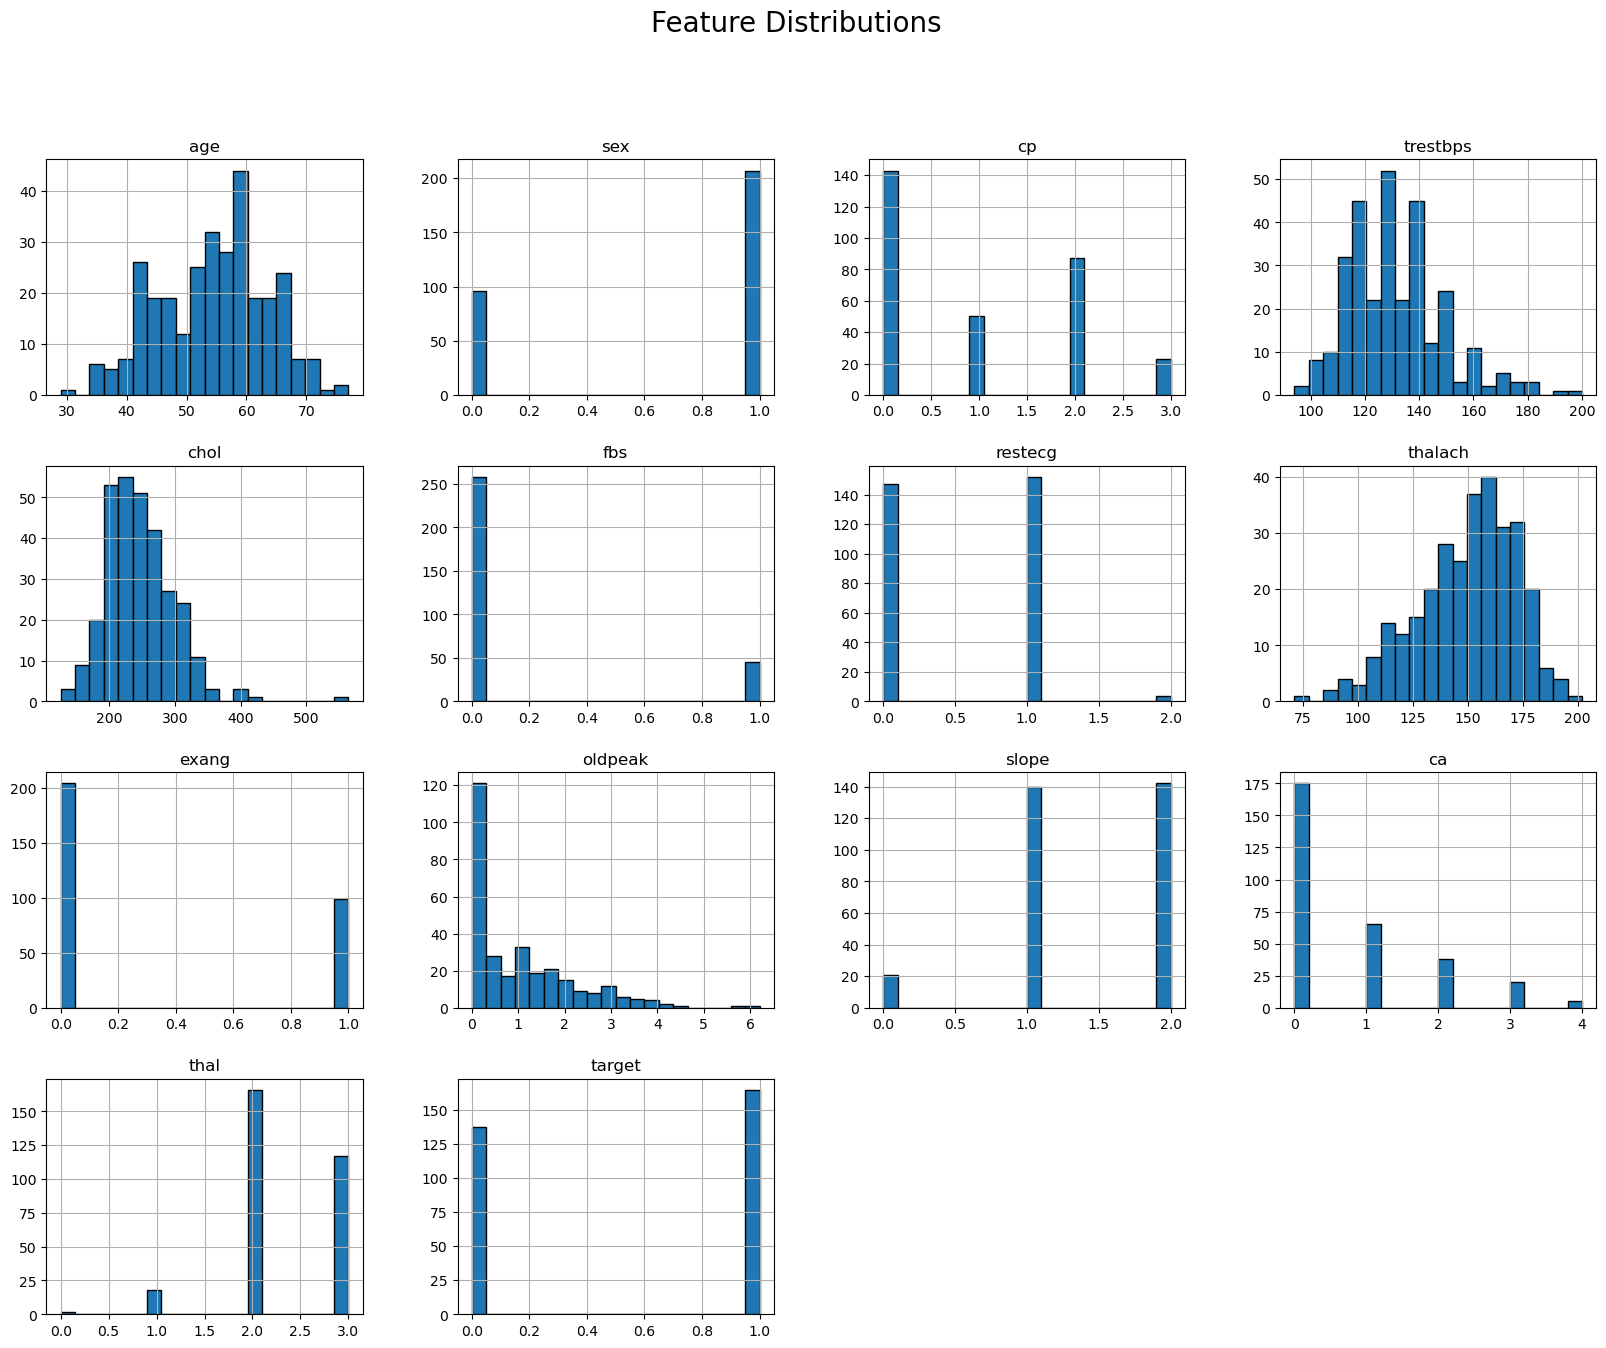

In [41]:
df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Feature Distributions', size=20)
plt.show()

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


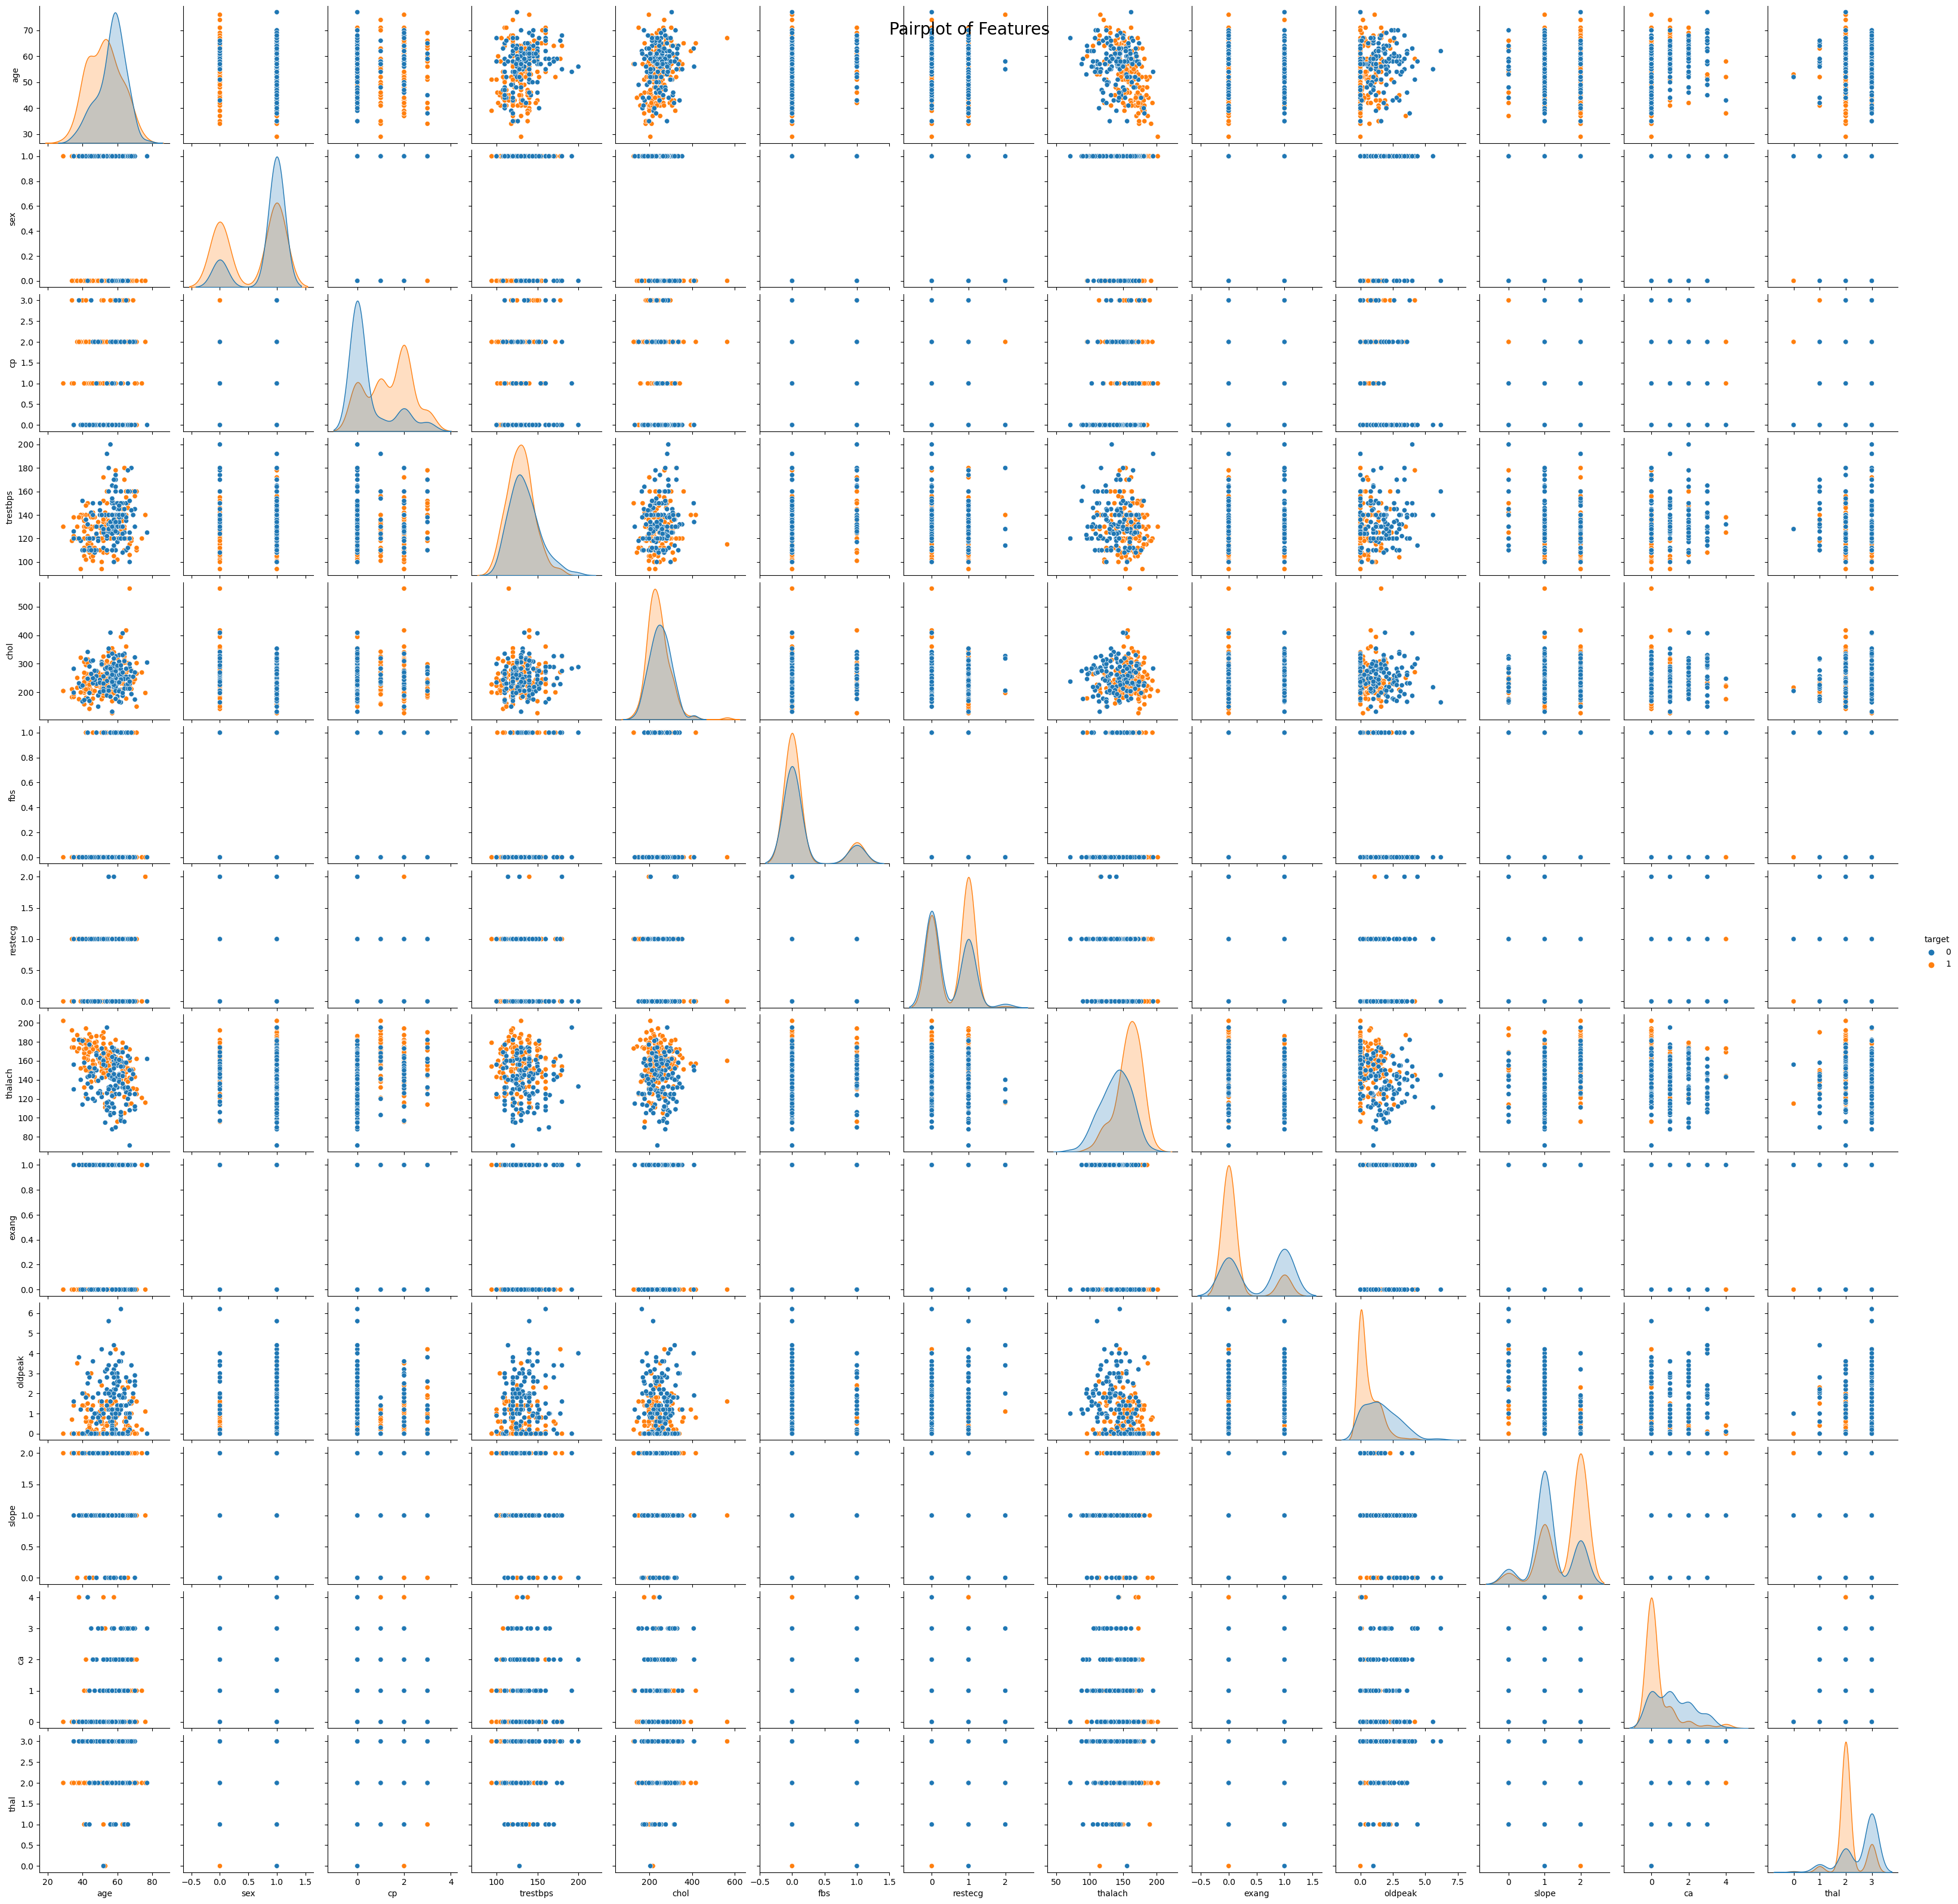

In [42]:
sns.pairplot(df, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Features', size=20)
plt.show()

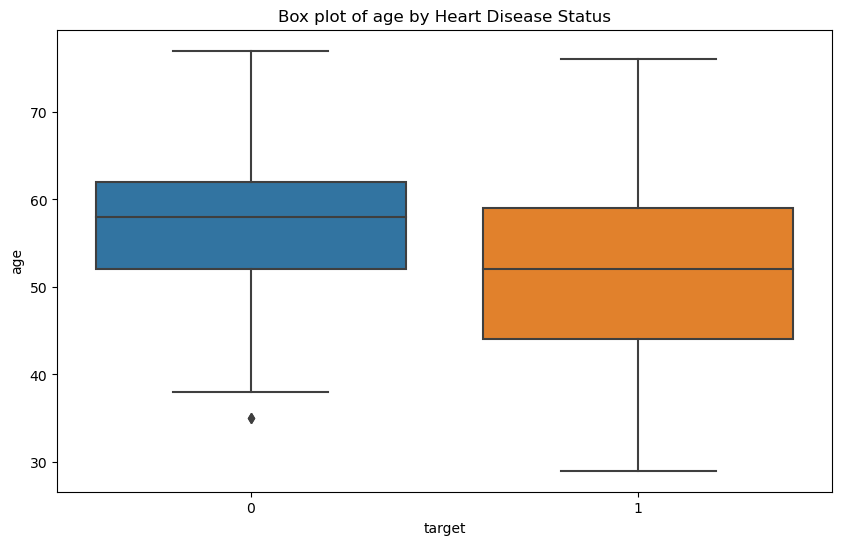

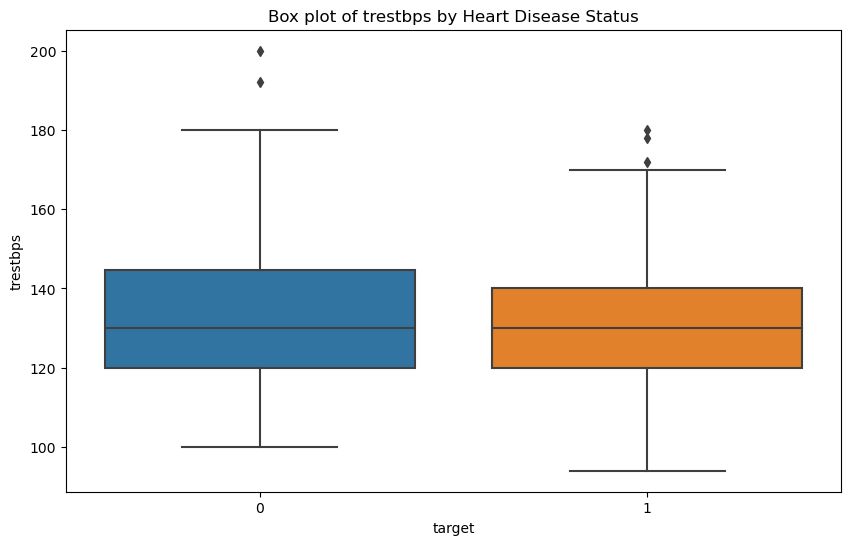

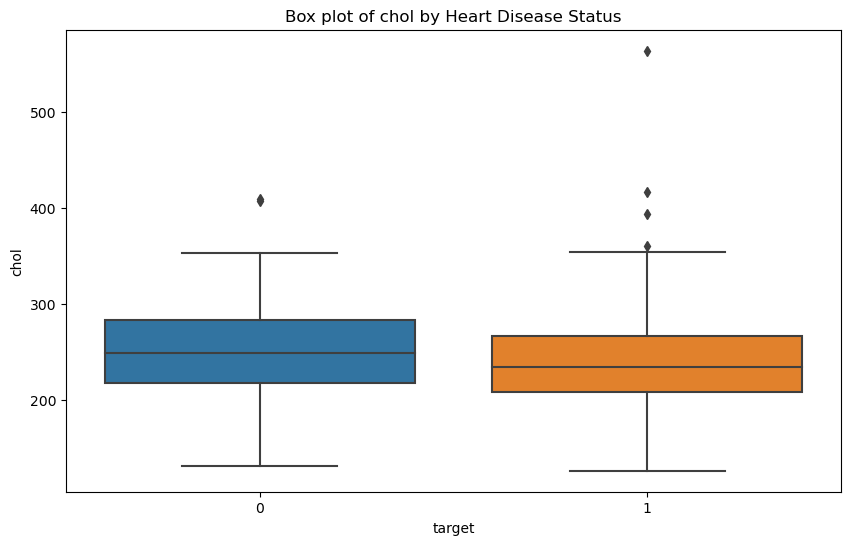

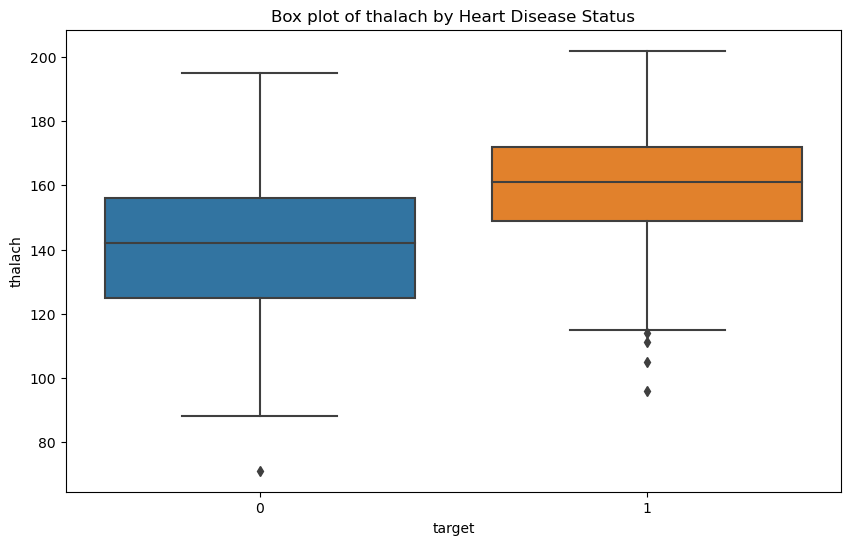

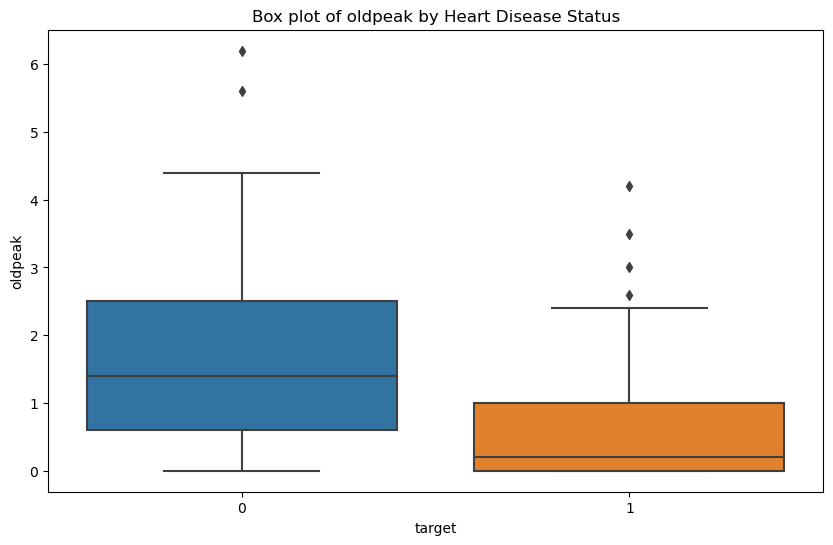

In [43]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Box plot of {feature} by Heart Disease Status')
    plt.show()

In [44]:
X = df.drop('target', axis=1)
y = df['target']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [47]:
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

In [48]:
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logistic)
print("Accuracy:", accuracy_logistic)

Logistic Regression Confusion Matrix:
[[32  9]
 [ 8 42]]
Accuracy: 0.8131868131868132


In [49]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

In [50]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_tree)
print("Accuracy:", accuracy_tree)

Decision Tree Confusion Matrix:
[[32  9]
 [15 35]]
Accuracy: 0.7362637362637363


In [52]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

In [53]:
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Confusion Matrix:")
print(conf_matrix_forest)
print("Accuracy:", accuracy_forest)

Random Forest Confusion Matrix:
[[33  8]
 [ 8 42]]
Accuracy: 0.8241758241758241


In [56]:
print("Confusion Matrices:")
print("Logistic Regression:\n", conf_matrix_logistic)
print("->"*20)
print("Decision Tree:\n", conf_matrix_tree)
print("->"*20)
print("Random Forest:\n", conf_matrix_forest)

Confusion Matrices:
Logistic Regression:
 [[32  9]
 [ 8 42]]
->->->->->->->->->->->->->->->->->->->->
Decision Tree:
 [[32  9]
 [15 35]]
->->->->->->->->->->->->->->->->->->->->
Random Forest:
 [[33  8]
 [ 8 42]]


In [57]:
print("Classification Reports:")
print("Logistic Regression:\n", classification_report(y_test, y_pred_logistic))
print("->"*20)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("->"*20)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Classification Reports:
Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

->->->->->->->->->->->->->->->->->->->->
Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

->->->->->->->->->->->->->->->->->->->->
Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy          

In [58]:
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

In [59]:
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

In [60]:
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)

In [65]:
print("Precision, Recall, F1 Score:")
print(" ")
print("Logistic Regression - Precision:", precision_logistic, "Recall:", recall_logistic, "F1 Score:", f1_logistic)
print(" ")
print("->"*50)
print(" ")
print("Decision Tree - Precision:", precision_tree, "Recall:", recall_tree, "F1 Score:", f1_tree)
print(" ")
print("->"*50)
print(" ")
print("Random Forest - Precision:", precision_forest, "Recall:", recall_forest, "F1 Score:", f1_forest)

Precision, Recall, F1 Score:
 
Logistic Regression - Precision: 0.8235294117647058 Recall: 0.84 F1 Score: 0.8316831683168316
 
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
 
Decision Tree - Precision: 0.7954545454545454 Recall: 0.7 F1 Score: 0.7446808510638298
 
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
 
Random Forest - Precision: 0.84 Recall: 0.84 F1 Score: 0.84


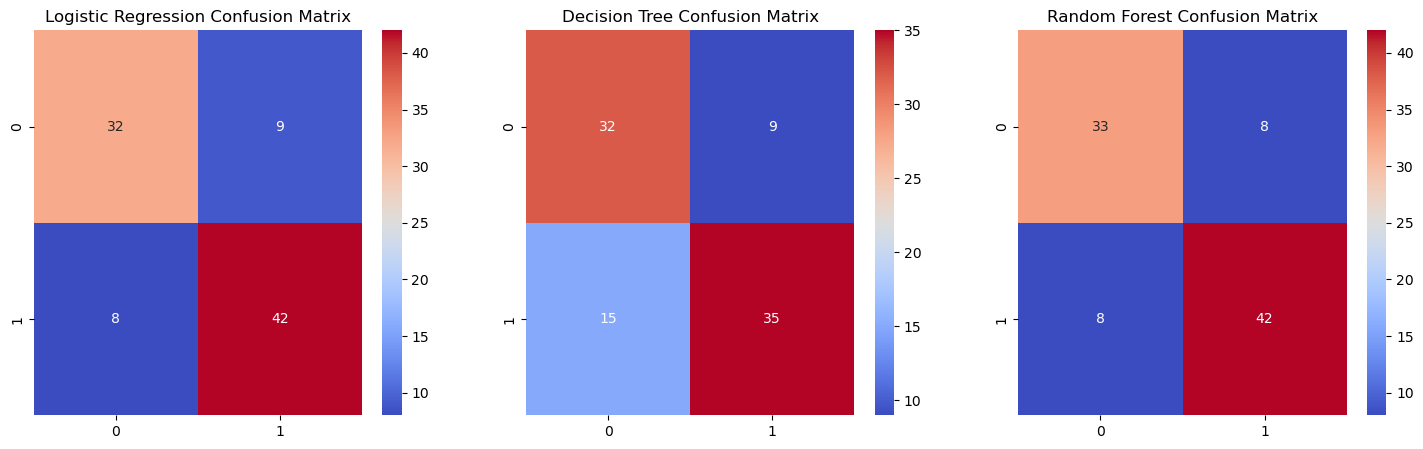

In [68]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="coolwarm")
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="coolwarm")
plt.title('Decision Tree Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="coolwarm")
plt.title('Random Forest Confusion Matrix')

plt.show()

In [69]:
best_model = max((accuracy_logistic, 'Logistic Regression'), 
                 (accuracy_tree, 'Decision Tree'), 
                 (accuracy_forest, 'Random Forest'))

print("Best Model:", best_model[1], "with accuracy", best_model[0])

Best Model: Random Forest with accuracy 0.8241758241758241
